# Введение. Базовые методы анализа данных.

# Библиотеки

In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Задание параметров ```matplotlib```

In [2]:
# параметр для задания толщины линии
plt.rcParams['lines.linewidth'] = 1
# параметр для задания ширины точек
plt.rcParams['lines.markersize'] = 6
# параметр для задания шрифта осей x и y (цифр на осях)
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
# параметр для задания шрифта на осях 
plt.rcParams['legend.fontsize'] = 24
# параметр для задания шрифта заголовка
plt.rcParams['axes.titlesize'] = 36
# параметр для задания шрифта осей x и y (название оси)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.figsize'] = (8.0, 4.0)
# параметр для задания шрифта вспомагательных записей на графику (annotate или text)
plt.rcParams['font.size'] = 10

# Построение графиков

## Построение одного графика

In [11]:
def plot():
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 6
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['legend.fontsize'] = 18
    plt.rcParams['axes.titlesize'] = 36
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['figure.figsize'] = (8.0, 4.0)
    plt.rcParams['font.size'] = 18
    ###########################################

    x = np.linspace(-np.pi, np.pi)
    y = np.sin(x)
    plt.plot(x, y, label='$y = sin(x)$')
    x = np.arange(-1, 2)
    y = x
    plt.plot(x, y, label='$y = x$')
    # отрисовка легенды графика
    plt.legend(loc='best')
    # подпись осей
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    # заголовок
    plt.title('Title')
    # отрисовка сетки на графике
    plt.grid()
    plt.show()

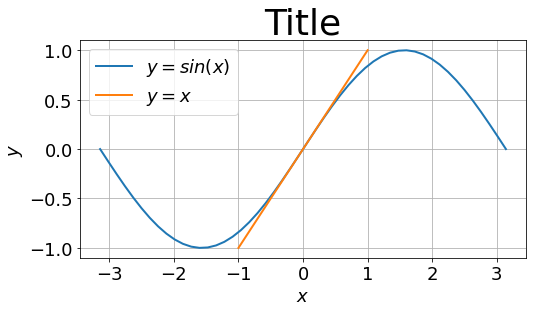

In [12]:
plot()

## Построение нескольких графиков

In [13]:
def plot():
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 6
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['legend.fontsize'] = 18
    plt.rcParams['axes.titlesize'] = 36
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['figure.figsize'] = (16.0, 8.0)
    plt.rcParams['font.size'] = 50
    ###########################################

    fig = plt.figure();

    gs = gridspec.GridSpec(2, 2)

    subs = []
    for sub in gs:
        subs.append(fig.add_subplot(sub))
    subs = np.reshape(subs, [2,2])

    subplotNames = ['First', 'Second', 'Third', 'Forth']

    for i in range(4):
        subs[i//2][i%2].annotate(text=subplotNames[i], xy=(0,0))
        subs[i//2][i%2].set_xlim(-1,1)
        subs[i//2][i%2].set_ylim(-1,1)

    plt.show()

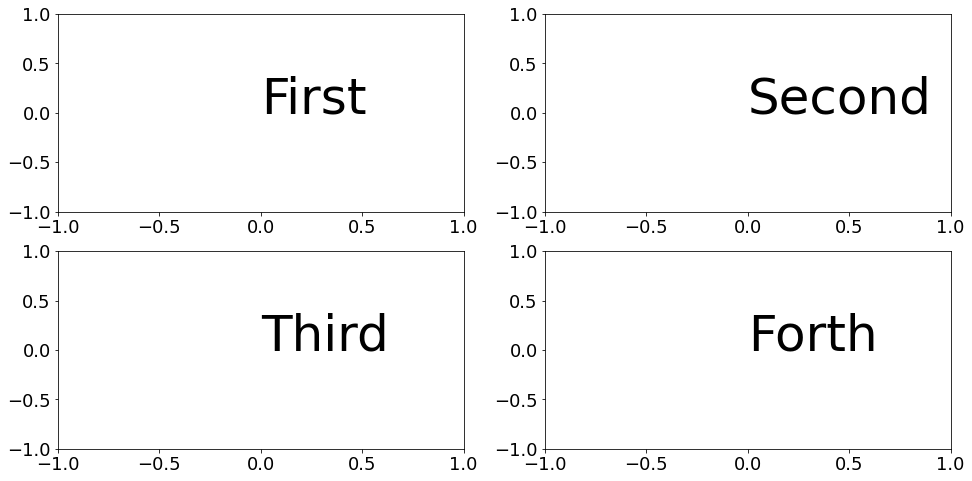

In [14]:
plot()

# Работа с ```pandas```

## Загрузка данных
Загрузим данные из csv-файла с помощью библиотеки pandas 

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [ ]:
data.head()

## Некоторые функции по работе с ```pandas```

### Сэмплируем данные из выборки

In [ ]:
data.sample(n=2, random_state=42)

### Выбираем интересующую нас колонку

In [ ]:
data['zn'].head(n=2)

### Выбираем несколько колонок

In [ ]:
data.iloc[:, 1:3].head(n=2)

### Выбираем интересующие нас строки

In [ ]:
data.iloc[1:3]

### Конвертируем данные из ```pandas``` в ```numpy``` массив

In [ ]:
data2 = data.to_numpy()
data3 = data.values

In [ ]:
(data3 - data2).sum()

# Визуализация

### Описание столбцов матрицы, описывающей выборку

In [ ]:
data.columns

```CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s```

### Выберем столбец MEDV

In [ ]:
x = data['medv'].values

## Гистограмма

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

plt.hist(x)
plt.show()

## Ядерная оценка

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

sns.kdeplot(x)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

sns.distplot(x)
plt.show()

## Корреляционная матрица
Отобразим корреляционную матрицу для всех признаков объекта

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
###########################################

matrix = np.corrcoef(data.values, rowvar=False)
im = plt.matshow(matrix)
plt.colorbar(im)
plt.show()

## Аналогичный график в seaborn + pandas

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['font.size'] = 10
###########################################

cor = data.corr().round(2)
sns.heatmap(data=cor, annot=True)
plt.show()

## Попарные диаграммы рассеяния для первых трех признаков

In [ ]:
sns.pairplot(data.iloc[:,0:3])
plt.show()

## Аналогичный график в matplotlib

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
###########################################

def make_scatter(i, j, subplot):
    subplot.scatter(data.values[:, i], data.values[:, j])

def make_plot(i, j, subplot):
    if i == j:
        # Ваш код здесь
    else:
        # Ваш код здесь
    
for i in range(3):
    for j in range(3):
        subplot = plt.subplot(3, 3, i*3 + j + 1) # нумерация с единицы
        make_plot(i, j, subplot)
        

# Выборочные оценки

## Среднее, медиану и дисперсию

In [ ]:
print('mean={}'.format(np.mean(x)))
print('std={}, std={}'.format(np.std(x), np.std(x, ddof=1)))

## Мода распределение

In [ ]:
print('median={}'.format(np.median(x)))
print('mode={}'.format(st.mode(x)))

## Минимальное и максимальное значение в выборке

In [ ]:
print('maximum={}; ({})'.format(np.max(x), np.argmax(x)))
print('minimum={}; ({})'.format(np.min(x), np.argmin(x)))

## Квантили распределения

In [ ]:
alpha = 0.5
print('q(0.5)={}'.format(np.quantile(x, alpha)))

## Интерквартильный размах

In [ ]:
# Ваш код здесь

```Ожидаемый ответ: ~7.975```

## Ранг $x=16$

In [ ]:
ind = np.where(x==16)[0]
print('rank(16)={}'.format(st.rankdata(x)[ind]))

## Построение cdf для подвыборки, содержащей только значения $>= 21.2$

In [ ]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
###########################################

plt.hist(x, cumulative=True, label='Full data')
plt.hist(x[x>=21.2], cumulative=True, label='$x>=21.2$')
plt.legend(loc='best')
plt.show()

## Выборочные оценки для подвыборки содержащей только значения $>=21.2$

In [ ]:
# Ваш код здесь

```Ожидаемый ответ
mean=29.001960784313727
std=8.224008139636966, std=8.240181229279456
median=25.0
mode=ModeResult(mode=array([50.]), count=array([16]))
maximum=50.0; (67)
minimum=21.2; (16)
q(0.5)=25.0
размах=9.600000000000001```